In [106]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [107]:
# ตั้งค่ากราฟ
plt.style.use("seaborn-v0_8-darkgrid")
sns.set(font_scale=1.2)
# ให้ pandas แสดงทุก column
pd.set_option("display.max_columns", None)

# กลุ่มหุ้น Magnificent Seven
TICKERS = ["AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "NVDA"]

# ระยะเวลาในการดึงข้อมูล
START = "2023-01-01"
END   = "2025-01-01"

data = {}
for t in TICKERS:
    df = yf.download(t, start=START, end=END, auto_adjust=False)  # ❗ ใช้ False เพื่อเก็บทั้ง Price + Adj Close
    if not df.empty:
        df["Daily Return"] = df["Adj Close"].pct_change()
        data[t] = df
    else:
        print(f"⚠️ Warning: No data for {t}")


multi_df = pd.concat({t: data[t] for t in data.keys()}, axis=1)
multi_df.head()





[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL                                                  \
Price        Adj Close       Close        High         Low        Open   
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-01-03  123.330643  125.070000  130.899994  124.169998  130.279999   
2023-01-04  124.602707  126.360001  128.660004  125.080002  126.889999   
2023-01-05  123.281342  125.019997  127.769997  124.760002  127.129997   
2023-01-06  127.817360  129.619995  130.289993  124.889999  126.010002   
2023-01-09  128.339981  130.149994  133.410004  129.889999  130.470001   

                                          MSFT                          \
Price          Volume Daily Return   Adj Close       Close        High   
Ticker           AAPL                     MSFT        MSFT        MSFT   
Date                                                                     
2023-01-03  112117500          NaN  234.423599  239.580002  245.750000   
2023-01-04   89113600     0.010314  224.169159  229.100006  232.869995   
2023-01-05   80962700    -0.010605  217.525284  222.309998  227.550003   
2023-01-06   87754700     0.036794  220.088882  224.929993  225.759995   
2023-01-09   70790800     0.004089  222.231735  227.119995  231.240005   

                                                               GOOGL  \
Price              Low        Open    Volume Daily Return  Adj Close   
Ticker            MSFT        MSFT      MSFT                   GOOGL   
Date                                                                   
2023-01-03  237.399994  243.080002  25740000          NaN  88.588699   
2023-01-04  225.960007  232.279999  50623400    -0.043743  87.554901   
2023-01-05  221.759995  227.199997  39585600    -0.029638  85.686111   
2023-01-06  219.350006  223.000000  43613600     0.011785  86.819321   
2023-01-09  226.410004  226.449997  27369800     0.009736  87.495255   

                                                                               \
Price           Close       High        Low       Open    Volume Daily Return   
Ticker          GOOGL      GOOGL      GOOGL      GOOGL     GOOGL                
Date                                                                            
2023-01-03  89.120003  91.050003  88.519997  89.589996  28131200          NaN   
2023-01-04  88.080002  90.650002  87.269997  90.349998  34854800    -0.011670   
2023-01-05  86.199997  87.570000  85.900002  87.470001  27194400    -0.021344   
2023-01-06  87.339996  87.690002  84.860001  86.790001  41381500     0.013225   
2023-01-09  88.019997  90.050003  87.860001  88.360001  29003900     0.007786   

                 AMZN                                                        \
Price       Adj Close      Close       High        Low       Open    Volume   
Ticker           AMZN       AMZN       AMZN       AMZN       AMZN      AMZN   
Date                                                                          
2023-01-03  85.820000  85.820000  86.959999  84.209999  85.459999  76706000   
2023-01-04  85.139999  85.139999  86.980003  83.360001  86.550003  68885100   
2023-01-05  83.120003  83.120003  85.419998  83.070000  85.330002  67930800   
2023-01-06  86.080002  86.080002  86.400002  81.430000  83.029999  83303400   
2023-01-09  87.360001  87.360001  89.480003  87.080002  87.459999  65266100   

                               META                                      \
Price      Daily Return   Adj Close       Close        High         Low   
Ticker                         META        META        META        META   
Date                                                                      
2023-01-03          NaN  124.059402  124.739998  126.370003  122.279999   
2023-01-04    -0.007924  126.675056  127.370003  129.050003  125.849998   
2023-01-05    -0.023726  126.247398  126.940002  128.520004  124.540001   
2023-01-06     0.035611  129.310608  130.020004  130.330002  126.040

In [108]:
adj_close = pd.concat({t: data[t]["Adj Close"] for t in data.keys()}, axis=1)
adj_close.head()

,AAPL,MSFT,GOOGL,AMZN,META,TSLA,NVDA
Ticker,AAPL,MSFT,GOOGL,AMZN,META,TSLA,NVDA
Date,,,,,,,
2023-01-03,123.330643,234.423599,88.588699,85.820000,124.059402,108.099998,14.302285
2023-01-04,124.602707,224.169159,87.554901,85.139999,126.675056,113.639999,14.735902
2023-01-05,123.281342,217.525284,85.686111,83.120003,126.247398,110.339996,14.252331
2023-01-06,127.817360,220.088882,86.819321,86.080002,129.310608,113.059998,14.845803
2023-01-09,128.339981,222.231735,87.495255,87.360001,128.763596,119.769997,15.614121


In [109]:
adj_close.describe()

,AAPL,MSFT,GOOGL,AMZN,META,TSLA,NVDA
Ticker,AAPL,MSFT,GOOGL,AMZN,META,TSLA,NVDA
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,188.427824,362.801015,140.646818,153.126753,384.210130,224.071275,72.311271
std,28.141456,62.499439,27.450562,36.496898,138.724441,58.662670,41.146206
min,123.281342,217.525284,85.686111,83.120003,124.059402,108.099998,14.252331
25%,170.266018,319.916359,122.756296,127.027500,285.242638,183.250000,41.935783
50%,183.653183,372.793488,137.649475,153.250000,352.526001,216.055000,49.773474
75%,213.038265,415.300636,164.109005,183.484997,503.040039,251.360001,115.411095
max,258.103729,463.240967,196.196259,232.929993,631.122559,479.859985,148.845734


ใช้ yfinance โหลดข้อมูลหุ้น Magnificent Seven (AAPL, MSFT, GOOGL, AMZN, META, TSLA, NVDA) ตั้งแต่ปี 2023 ถึงต้นปี 2025

เก็บข้อมูลทั้งหมด (Open, High, Low, Close, Adj Close, Volume)

สร้าง feature Daily Return จากการเปลี่ยนแปลงของ Adj Close

รวมข้อมูลเป็น multi_df (หลายหุ้น หลาย feature) และ adj_close (เฉพาะราคาปรับแล้ว)

📌 จุดสำคัญ: ใช้ Adjusted Close เพราะปรับผลของ stock split และ dividend แล้ว เหมาะกับการวิเคราะห์ระยะยาว

### 📈 Cell 2 — Price Trend (แนวโน้มราคาแบบปรับแล้ว)

- ทำไมต้องใช้ Adj Close: ปรับผลของ split/dividend แล้ว เหมาะกับการเปรียบเทียบยาว ๆ

C:\Users\HP\AppData\Local\Temp\ipykernel_20196\1118573207.py:3: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(adj_close.index, adj_close[t], label=t)


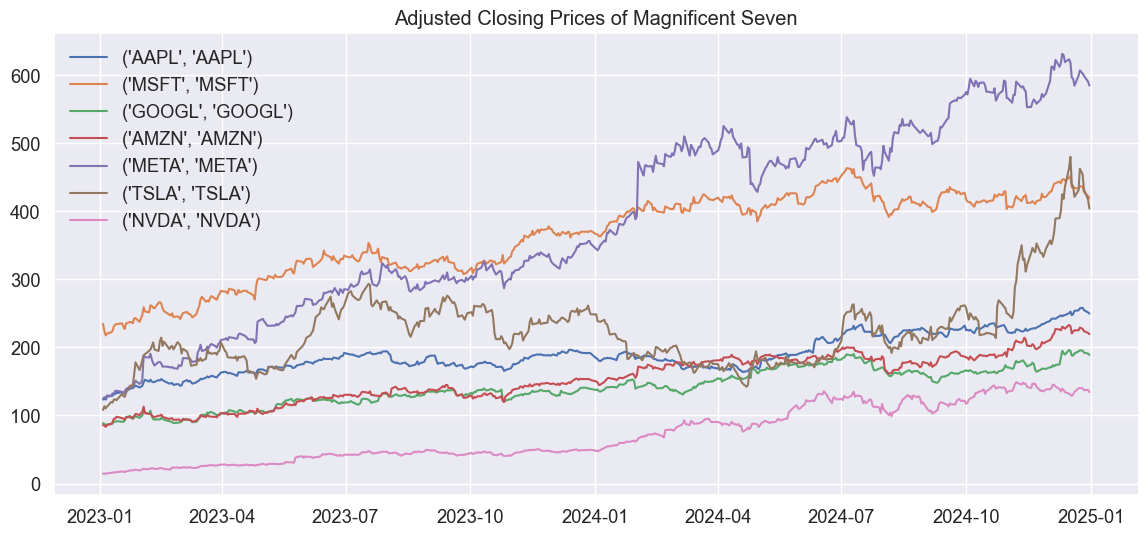

In [110]:
plt.figure(figsize=(14,6))
for t in adj_close.columns:
    plt.plot(adj_close.index, adj_close[t], label=t)
plt.title("Adjusted Closing Prices of Magnificent Seven")
plt.legend()
plt.show()


### 📉 Cell 3 — Daily Returns (ผลตอบแทนรายวัน)
- เหตุผล: การวิเคราะห์ “ผลตอบแทน” แทน “ราคา” ทำให้เปรียบเทียบต่างสเกลง่ายและใช้วัดความเสี่ยงได้

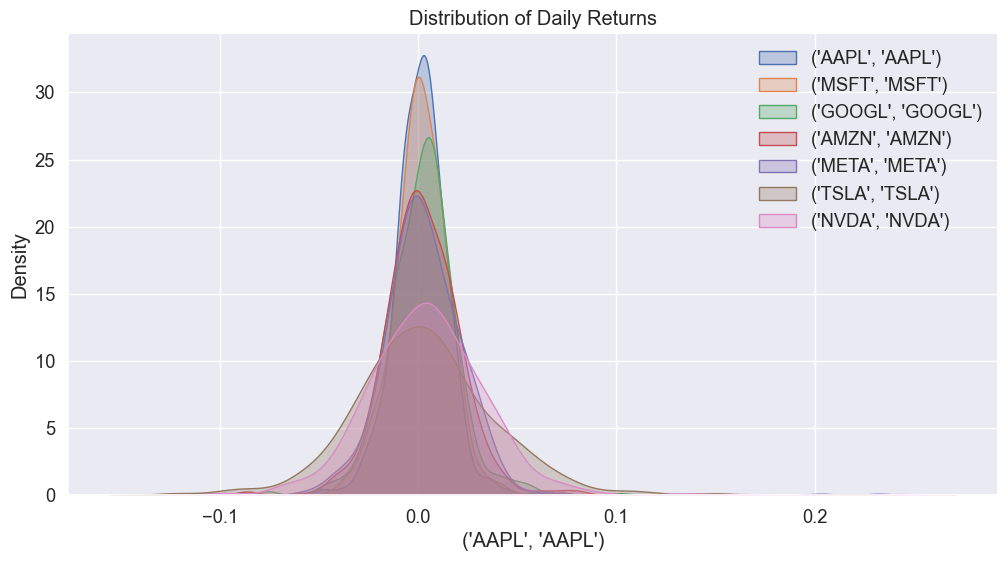

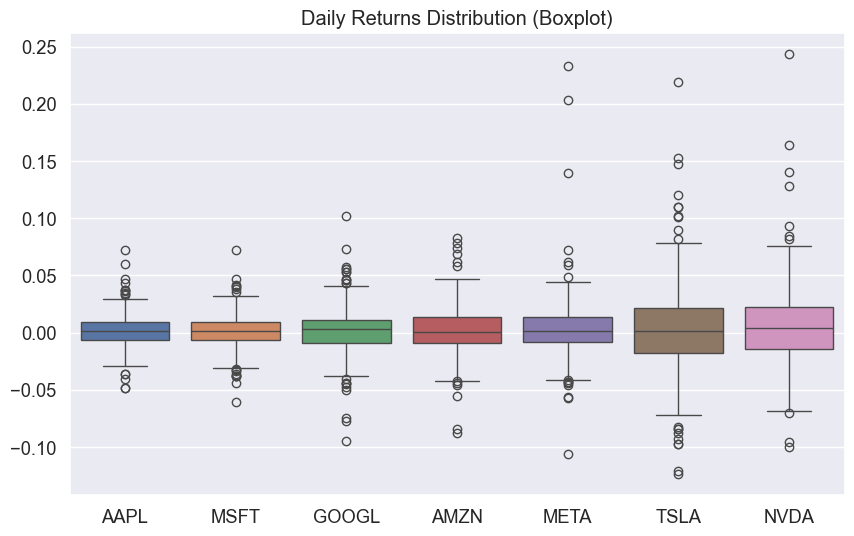

In [111]:
returns = adj_close.pct_change().dropna()

# KDE Plot
plt.figure(figsize=(12,6))
for t in returns.columns:
    sns.kdeplot(returns[t], label=t, fill=True, alpha=0.3)
plt.title("Distribution of Daily Returns")
plt.legend()
plt.show()

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=returns)
plt.title("Daily Returns Distribution (Boxplot)")
plt.show()


KDE Plot (Distribution):

เส้นโค้งของผลตอบแทนรายวันแต่ละหุ้น

โค้งกว้าง = ผันผวนมาก (TSLA, NVDA)

โค้งแคบ = เสี่ยงน้อย (MSFT, AAPL)

Boxplot:

ใช้เทียบค่ากลางและ outlier

หุ้นที่มีหางยาว (long tail) = มี extreme move บ่อย

C:\Users\HP\AppData\Local\Temp\ipykernel_20196\920975957.py:4: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(vol, label=t)


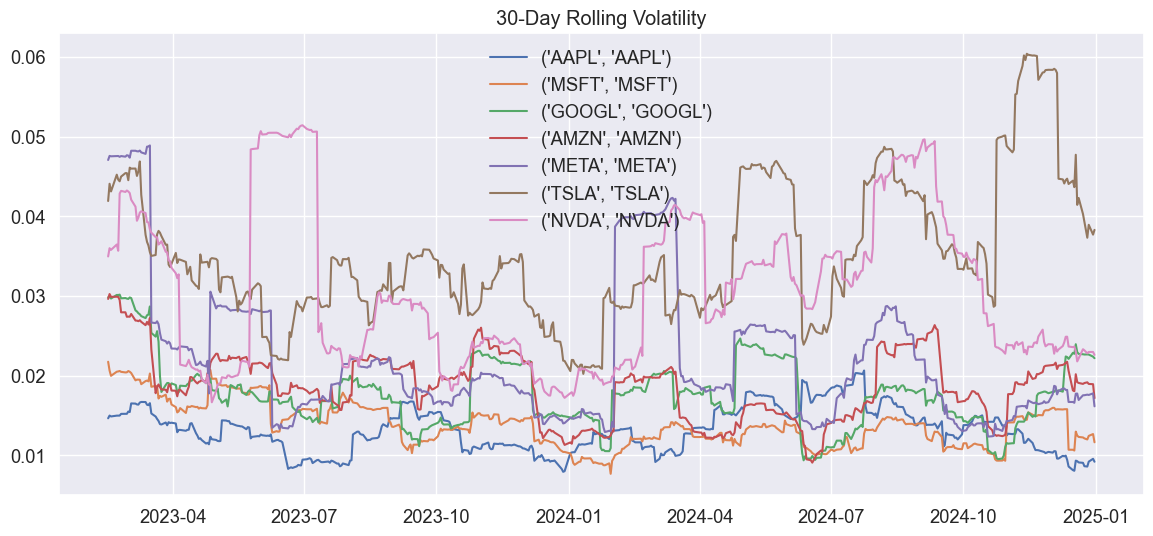

In [112]:
plt.figure(figsize=(14,6))
for t in returns.columns:
    vol = returns[t].rolling(30).std()
    plt.plot(vol, label=t)
plt.title("30-Day Rolling Volatility")
plt.legend()
plt.show()


กราฟ: ความผันผวนของผลตอบแทน (ค่าเบี่ยงเบนมาตรฐาน 30 วัน)

อธิบาย:

TSLA และ NVDA มี volatility พุ่งขึ้นในบางช่วง (ข่าวใหญ่/earnings)

MSFT และ AAPL มี volatility คงที่กว่ามาก

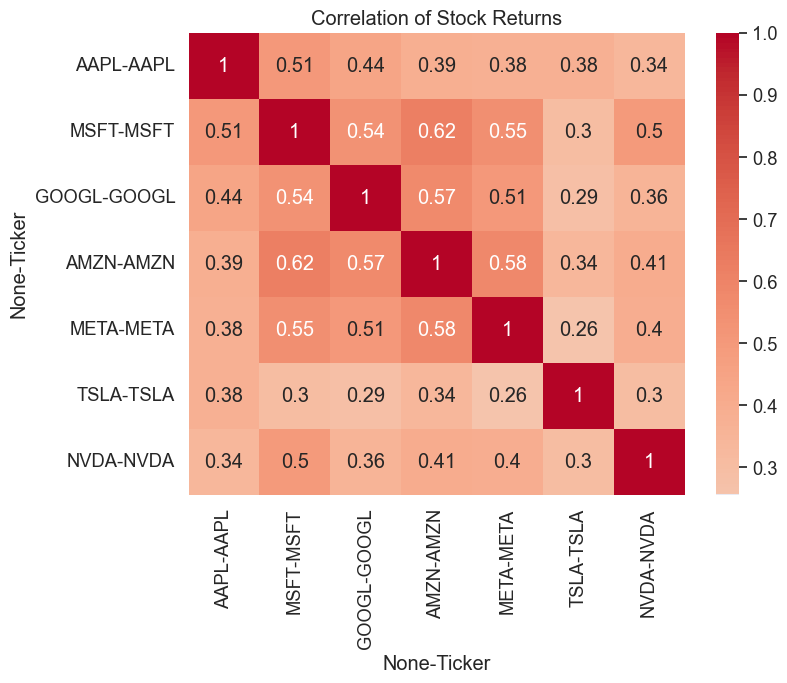

In [113]:
plt.figure(figsize=(8,6))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Stock Returns")
plt.show()



กราฟ: Heatmap ความสัมพันธ์ของผลตอบแทนแต่ละหุ้น

อธิบาย:

AAPL–MSFT มี correlation สูง เพราะทั้งคู่เป็น tech blue-chip

TSLA correlation ค่อนข้างต่ำ → พอร์ตที่ใส่ TSLA กระจายความเสี่ยงได้

META และ GOOGL มี correlation กันสูง เพราะอยู่ในกลุ่ม digital ads

C:\Users\HP\AppData\Local\Temp\ipykernel_20196\1792285502.py:5: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(cumulative_returns.index, cumulative_returns[t], label=t)


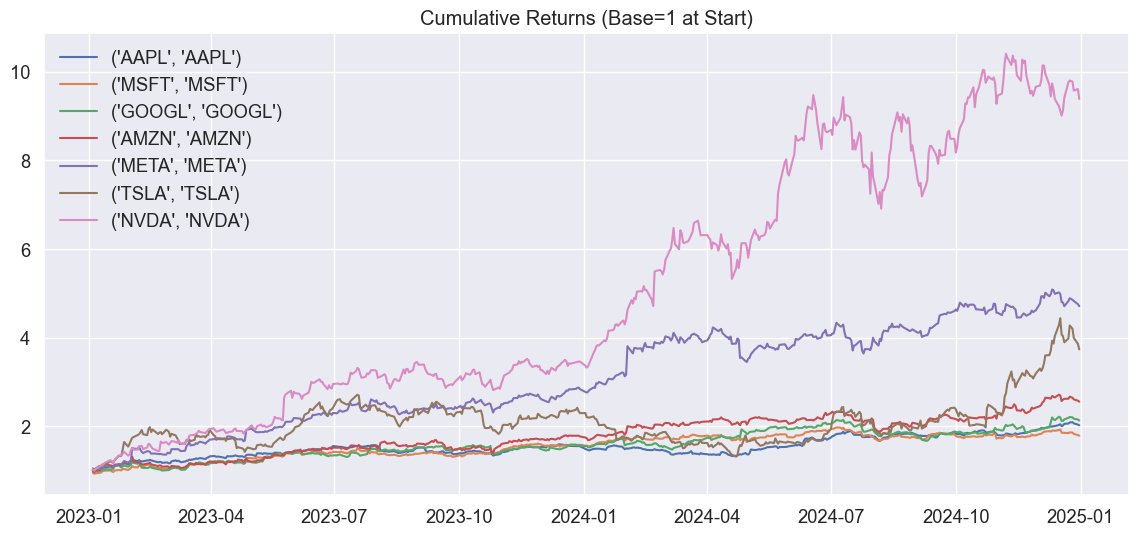

In [114]:
cumulative_returns = (1 + returns).cumprod()

plt.figure(figsize=(14,6))
for t in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[t], label=t)
plt.title("Cumulative Returns (Base=1 at Start)")
plt.legend()
plt.show()



กราฟ: ผลตอบแทนสะสมตั้งแต่ปี 2023

อธิบาย:

NVDA outperform ทุกตัว (ราคาพุ่งจาก AI trend)

AAPL/MSFT ให้ผลตอบแทน steady positive

AMZN/META มีการแกว่ง แต่ยัง upward trend

TSLA มีทั้งช่วงพุ่งและร่วงแรง → เสี่ยงแต่มีโอกาส